# Dataset Description
## Overview
#### The data has been split into two groups:
- training set (train.csv)
- test set (test.csv)


Here __train.csv__ contains the details of a subset of the passengers on board (891 passengers, to be exact - where each passenger gets a different row in the table)

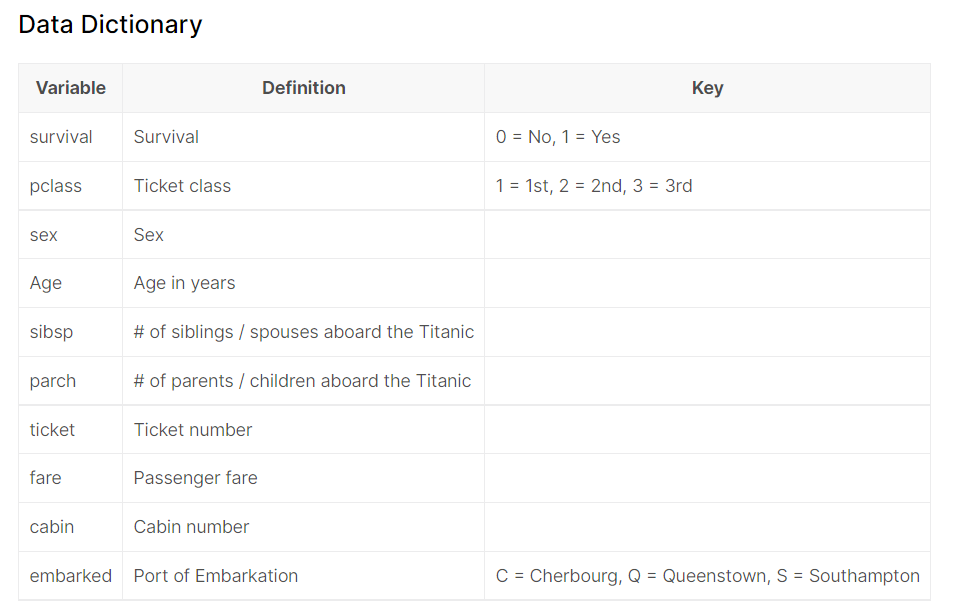

Let's have a look at our train dataset

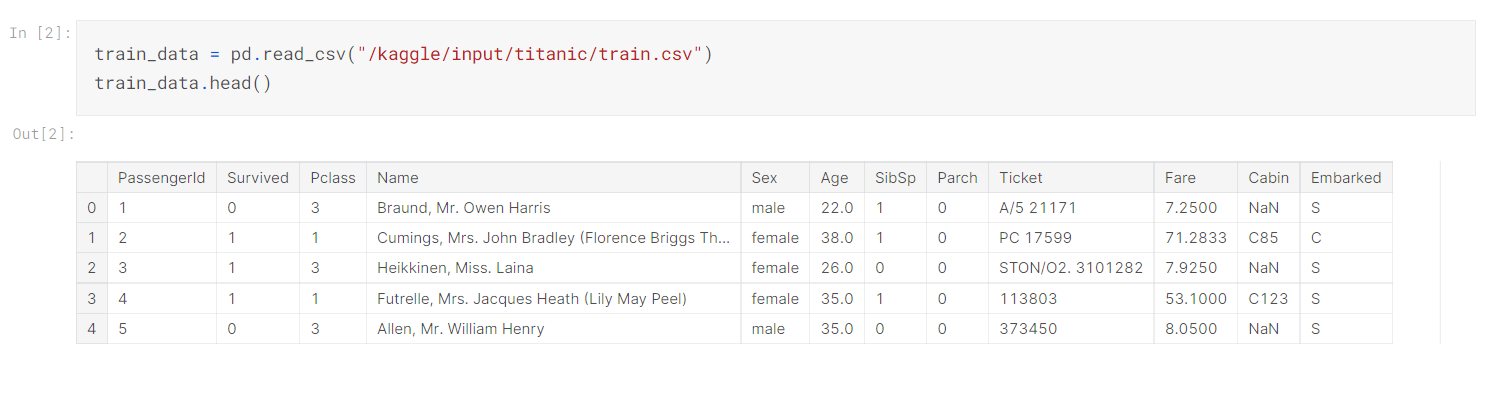

Below is the glimpse of test dataset

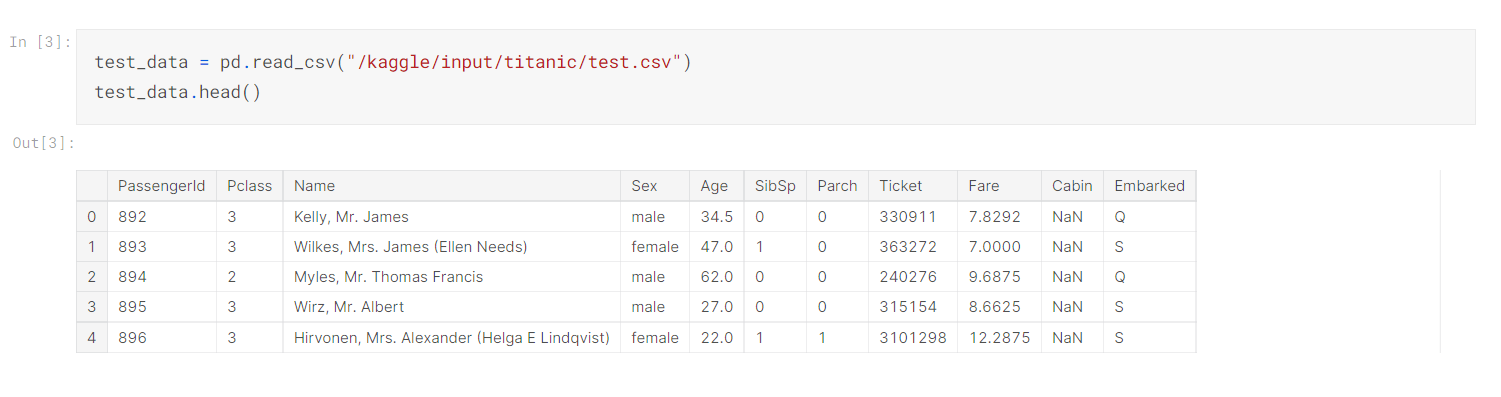

https://en.wikipedia.org/wiki/Random_forest
With the given dataset we will now train a model using Random Forest Classifier. Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time.

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

##### Below is the accuracy of the model created by following the tutorial given in kaggle

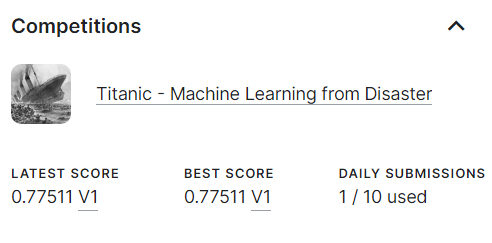

As we can see the accuracy is __77.51%__

***
# Contribution
***

In order to improve accuracy of the model let us first understand the concept and logic behind the base model. Here 4 features are taken into account i.e PClass, Sex, SibSp, Parch. Based on the these features a classification model is generated.

If we change few parameters it is possible to increase the accuracy of the model.
Here, we can tweak parameters of Random Forest Classifier. If we change __n_estimators__ from 100 to 500 we can see slight increase in accuracy. It increased from __77.51% to 77.99%__. There is a slight increase in the accuracy. Reason behind getting low accuracy is due to the rows in the dataset which contains __NULL__ value. This greatly affects on training of the model. Ways to get rid of these data is to either drop the rows or replace the NULL values with mean/median/mode of that particular column. Since we have very less data it won't be a good idea to drop the NULL value rows. Instead let us try another classifier and check accuracy.

For this purpose we are going to use Decision Tree Classifier. Below is the accuracy achieved by changing the algorithm. 

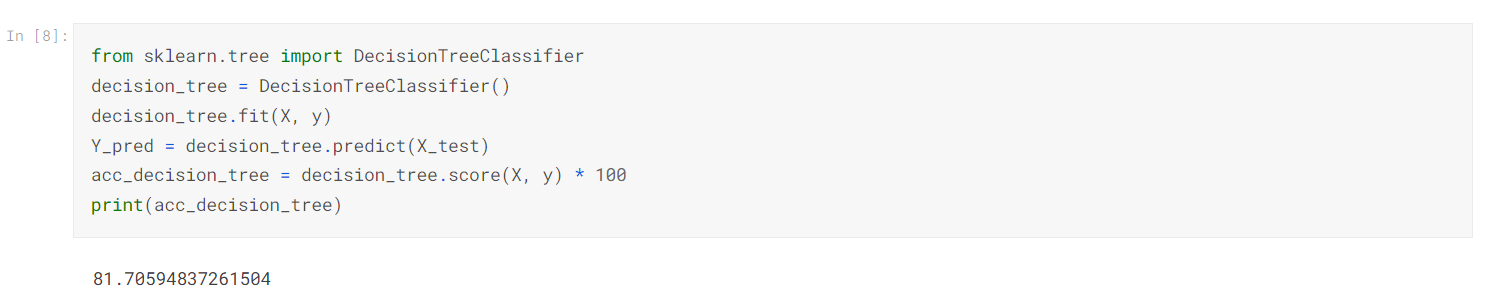

Here, we are able to achieve accuracy upto __81.71%__. 